In [1]:
import numpy
import matplotlib.pyplot as pyplot
from geom2D import Elem, CreateFlashH5

(-0.549971021047629,
 0.5499986200498871,
 -0.5492345347094286,
 0.5340770244577787)

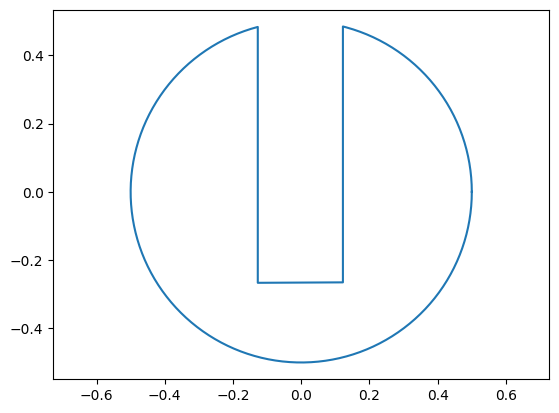

In [2]:
npoints = 300
theta = numpy.linspace(0, 2*numpy.pi, npoints)
xcircle = 0.5*numpy.cos(theta)
ycircle = 0.5*numpy.sin(theta)

theta_diff = 15
theta_min = ((90-theta_diff)/180)*numpy.pi
theta_max = ((90+theta_diff)/180)*numpy.pi

theta_remove = theta[numpy.where((theta > theta_min) & (theta < theta_max))]

xrect = numpy.array([0.5*numpy.cos(theta_remove[0]), 0.5*numpy.cos(theta_remove[-1])])
yrect = numpy.array([0.5*numpy.sin(theta_remove[0])-0.75,0.5*numpy.sin(theta_remove[-1])-0.75])


xbody = []
ybody = []

rect_count = 0
for i in range(npoints):
    if ((theta[i] <= theta_remove[0]) or (theta[i] >= theta_remove[-1])):
        xbody.append(xcircle[i])
        ybody.append(ycircle[i])
    elif rect_count < len(xrect):
        xbody.append(xrect[rect_count])
        ybody.append(yrect[rect_count])
        rect_count = rect_count + 1

nbody = len(xbody)
xbody = numpy.array(xbody)
ybody = numpy.array(ybody)

pyplot.figure()
pyplot.plot(xbody,ybody)
pyplot.axis('equal')

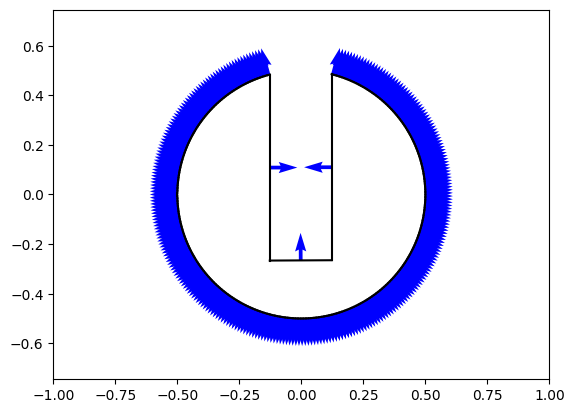

In [3]:
elems = []

for i in range(nbody-1):
    elems.append(Elem([xbody[i+1], ybody[i+1]], 
                      [xbody[i], ybody[i]]))

pyplot.figure()
for elem in elems:
    #elem.rotate(120)
    pyplot.plot([elem.pA[0], elem.pB[0]],[elem.pA[1], elem.pB[1]],'k')
    #pyplot.scatter(elem.center[0], elem.center[1], color='k', marker='o', s=100)
    pyplot.quiver(elem.center[0], elem.center[1], elem.normal[0], elem.normal[1], scale=18, color='b')
    #pyplot.quiver(elem.center[0], elem.center[1], elem.tangent[0], elem.tangent[1], scale=18, color='orange')
    pyplot.axis('equal')
    pyplot.xlim([-1, 1])
    pyplot.ylim([-1, 1])

In [4]:
CreateFlashH5("../../simulation/ImBound/Example2D/disk_hdf5_ibd_0001", elems)